In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv("data_train.csv",delimiter = ',')
test = pd.read_csv("data_test.csv", delimiter = ',')

In [3]:
HEIGHT = 28
WIDTH = 28

In [4]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

In [5]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7404, 784) (7404,) (1851, 784) (1851,)


In [6]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    # image = np.fliplr(image)
    # image = np.rot90(image)
    return image

In [7]:
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (7404, 28, 28)
test_x: (1851, 28, 28)


In [8]:
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

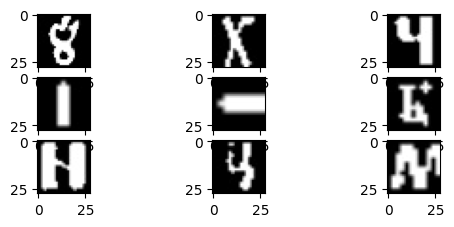

In [9]:
for i in range(300, 309):
    plt.subplot(330 + (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    # plt.title(train_y[i])

In [10]:
num_classes = train_y.nunique()

In [11]:
train_y = np_utils.to_categorical(train_y,num_classes)
test_y = np_utils.to_categorical(test_y,num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (7404, 42)
test_y:  (1851, 42)


In [12]:
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [17]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.1, random_state=7)

In [18]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(train_x, train_y, epochs=40, batch_size=72, verbose=1, \
                    validation_data=(val_x, val_y))

Epoch 1/40
84/84 [==============================] - 2s 12ms/step - loss: 1.9559 - accuracy: 0.4655 - val_loss: 0.2751 - val_accuracy: 0.9400
Epoch 2/40
84/84 [==============================] - 1s 7ms/step - loss: 0.4834 - accuracy: 0.8606 - val_loss: 0.1463 - val_accuracy: 0.9670
Epoch 3/40
84/84 [==============================] - 1s 6ms/step - loss: 0.2887 - accuracy: 0.9173 - val_loss: 0.1195 - val_accuracy: 0.9730
Epoch 4/40
84/84 [==============================] - 1s 7ms/step - loss: 0.1886 - accuracy: 0.9471 - val_loss: 0.0978 - val_accuracy: 0.9730
Epoch 5/40
84/84 [==============================] - 1s 7ms/step - loss: 0.1545 - accuracy: 0.9538 - val_loss: 0.0710 - val_accuracy: 0.9805
Epoch 6/40
84/84 [==============================] - 1s 7ms/step - loss: 0.1368 - accuracy: 0.9573 - val_loss: 0.0830 - val_accuracy: 0.9850
Epoch 7/40
84/84 [==============================] - 1s 7ms/step - loss: 0.1257 - accuracy: 0.9628 - val_loss: 0.0740 - val_accuracy: 0.9910
Epoch 8/40
84/84 [=

In [21]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

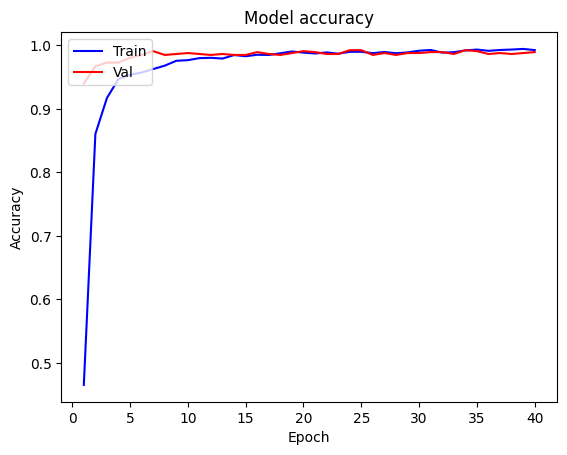

In [23]:
plotgraph(epochs, acc, val_acc)

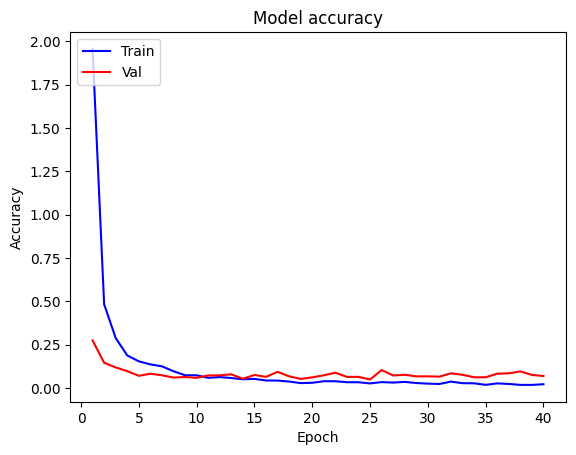

In [24]:
plotgraph(epochs, loss, val_loss)

In [25]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06834922730922699
Test accuracy: 0.9913560152053833


In [26]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

58/58 [==============================] - 0s 2ms/step


In [27]:
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

In [28]:
cm

array([[44,  0,  0, ...,  0,  0,  0],
       [ 0, 44,  0, ...,  0,  0,  0],
       [ 0,  0, 35, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 36,  0,  0],
       [ 0,  0,  0, ...,  0, 34,  0],
       [ 0,  0,  0, ...,  0,  0, 39]])

In [29]:
sum = 0
for i in range(cm.shape[0]):
  for j in range (cm.shape[1]):
      if i != j:
        sum += cm[i][j]
sum

17

In [30]:
model.save('../model_letters', save_format="h5")